In [26]:
import pandas as pd
# Sökvägar till parquet-filerna
age_path = r"C:\Users\fabia\AH1023\Projekt\Projekt_2\data\deso_age_ume.parquet"
pop_work_path = r"C:\Users\fabia\AH1023\Projekt\Projekt_2\data\deso_pop_work_ume.parquet"
pop_emp_ume = r"C:\Users\fabia\AH1023\Projekt\Projekt_2\data\deso_emp_ume.parquet"
# Läs in data från parquet-filerna skapa data frames 
df_age = pd.read_parquet(age_path)
df_pop_work = pd.read_parquet(pop_work_path)
df_emp = pd.read_parquet(pop_emp_ume)
# Gör kolumner med numeriska värden till numeriska datatyper
# Räkna ut och print total befolkning och totalt antal arbetsplatser
totbef_num =pd.to_numeric(df_age['Totalt'], errors='coerce')
print("Total befolkning:", totbef_num.sum())
dagbef_num = pd.to_numeric(df_pop_work['Sysselsatt'], errors='coerce')
print("Totalt antal arbetsplatser:", dagbef_num.sum())

Total befolkning: 164804
Totalt antal arbetsplatser: 77562


In [27]:
# Slå ihop data frames till en enda data frame
df = pd.concat([df_age, df_pop_work, df_emp], axis=1)
# Ta bort dubbletter av kolumner
df = df.loc[:, ~df.columns.duplicated()]
print(df.head())

        DESO  Alder_0_6  Alder_7_15  Alder_16_1  Alder_20_2  Alder_25_4  \
0  2401A0010        109         135          55          57         280   
1  2401A0020        100         104          75          62         265   
2  2401B2010        108         156          49          57         334   
3  2401C1010         49          63          29          24         130   
4  2401C1020        136         212          98         131         433   

   Alder_45_6  Alder_65  Totalt  Sysselsatt  EjSysselsatt  retail  \
0         442       482    1565         649           110    68.0   
1         389       404    1400         621            95    25.0   
2         320       340    1369         595           141     1.0   
3         180       237     716         298            46     1.0   
4         422       542    1978         794           158    13.0   

   hospitality  business  government  education  healthcare  recreation  total  
0         14.0      68.0        15.0       69.0      

In [ ]:
import geopandas as gpd

zones_path= r"C:\Users\fabia\AH1023\Projekt\Projekt_2\data\deso_zones_ume.parquet"
net_path = r"C:\Users\fabia\AH1023\Projekt\Projekt_2\data\roadnet_ume_municipality.parquet"

df_zon=gpd.read_parquet(zones_path);
df_path=gpd.read_parquet(net_path);

df_zon_vald = df_zon.loc[df_zon["ID"] == "2480C1020"]

links_in_zone = gpd.sjoin(df_path, df_zon_vald, how='inner', predicate='intersects')
print(f"Antal länkar i zonen: {len(links_in_zone)}")
print("Kolumner i links_in_zone:", links_in_zone.columns.tolist())


Antal länkar i zonen: 336
Kolumner i links_in_zone: ['link_id', 'from_id', 'to_id', 'mode', 'lanes', 'lanedef', 'speed', 'direction', 'roadtype', 'funcclass', 'adt_f', 'length', 'is_rev', 'geometry', 'index_right', 'ID', 'komnamn', 'lannamn']


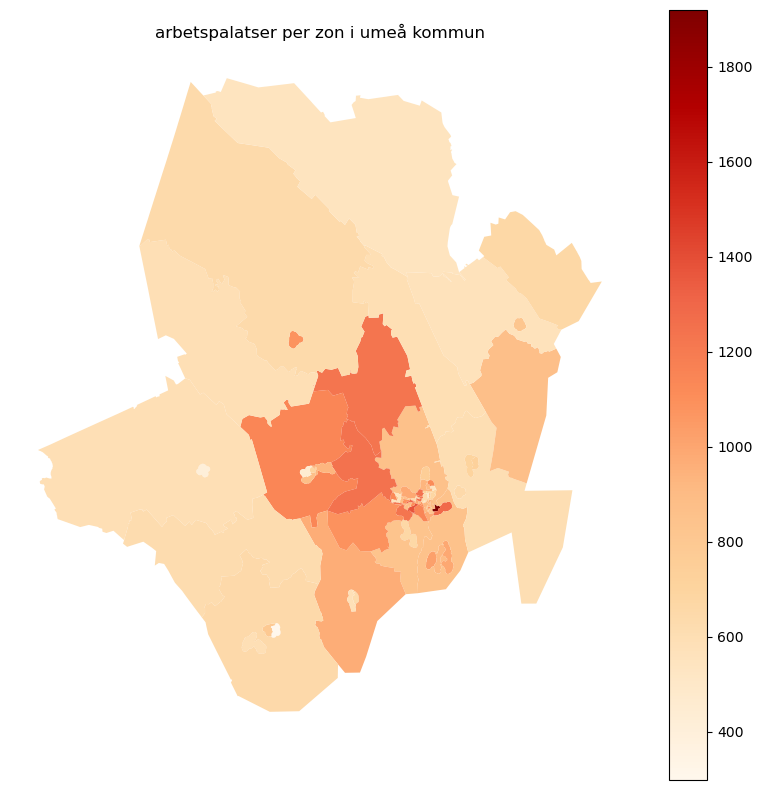

In [ ]:

# slå ihop geografierna med Sysselsatt (matcha df_zon.ID mot df_pop_work.DESO)
df_geo_work = df_zon.merge(df_pop_work[['DESO', 'Sysselsatt']], left_on='ID', right_on='DESO', how='left')

# säkerställ numerisk kolumn
df_geo_work['Sysselsatt'] = pd.to_numeric(df_geo_work['Sysselsatt'], errors='coerce')

# rita choropleth
ax = df_geo_work.plot(column='Sysselsatt', cmap='OrRd', legend=True, figsize=(10,10),
                 missing_kwds={'color': 'lightgrey', 'label': 'saknas'})
ax.set_title('arbetspalatser per zon i umeå kommun')
ax.set_axis_off()
print(df_geo_work)